Enter the video path: C:\Users\saim\Downloads\demo_vid_1.mp4
Enter the temp frames folder prefix: frames1


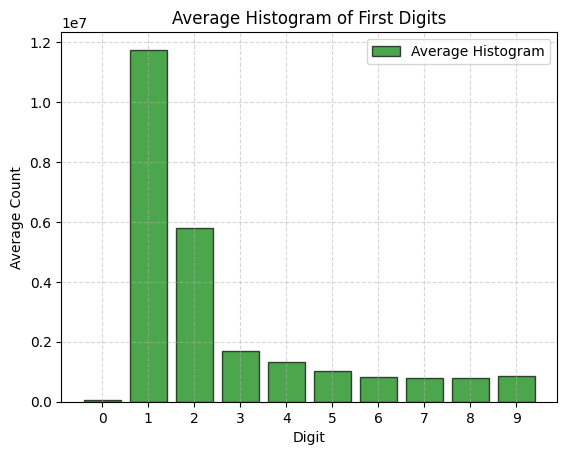

Here is your average histogram.
Time taken: 2263.954232931137 seconds


In [1]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

def extract_frames(video_path, output_dir="frames"):
    """Extracts frames from a video and saves them as temporary files.

    Args:
        video_path (str): Path to the video file.
        output_dir (str, optional): Directory to save the extracted frames. Defaults to 'frames'.
    """

    cap = cv2.VideoCapture(video_path)  # Indent this line correctly

    try:
        if not cap.isOpened():
            raise ValueError("Error opening video file")

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        frame_count = 0
        while True:
            ret, frame = cap.read()  # Read the frame

            if not ret:
                break

            # Generate a unique filename for each frame
            filename = f"frame_{frame_count:05d}.jpg"
            filepath = os.path.join(output_dir, filename)

            cv2.imwrite(filepath, frame)  # Save the frame
            frame_count += 1

    finally:
        cap.release()
        
def convert_image_to_numbers(image_path):
    image = Image.open(image_path)

    # Convert the image to a NumPy array.
    image_array = np.array(image)

    # Flatten the NumPy array.
    flattened_image_array = image_array.flatten()

    # Convert the flattened NumPy array to a list of integers.
    numbers = flattened_image_array.tolist()

    return numbers

def extract_first_digit(numbers):
    return [int(str(number)[0]) for number in numbers]

def plot_digit_counts_with_normal_curve(first_digits):
    digit_counts = np.bincount(first_digits)
    digits = np.arange(10)

    # Plot the histogram
    plt.bar(digits, digit_counts, color='blue', alpha=0.7, align='center', edgecolor='black', label='Histogram')
    plt.xticks(digits)
    plt.xlabel('Digit')
    plt.ylabel('Count / Probability Density')
    plt.title('Count of Each Digit and Normal Distribution Curve')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def count_digit_occurrences(numbers):
    digit_counts = [0] * 10

    for number in numbers:
        first_digit = int(str(number)[0])
        digit_counts[first_digit] += 1

    return digit_counts

def create_average_histogram(digit_counts_list):
    average_counts = np.mean(digit_counts_list, axis=0)
    digits = np.arange(10)
    plt.bar(digits, average_counts, color='green', alpha=0.7, align='center', edgecolor='black', label='Average Histogram')
    plt.xticks(digits)
    plt.xlabel('Digit')
    plt.ylabel('Average Count')
    plt.title('Average Histogram of First Digits')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

if __name__ == '__main__':
    start_time = time.time()  # Start timer

    video_path = input("Enter the video path: ")
    name = input("Enter the temp frames folder prefix: ")
    output_dir = f"{name}_frames"

    extract_frames(video_path, output_dir)

    digit_counts_list = []
    for filename in sorted(os.listdir(output_dir)):
        frame_path = os.path.join(output_dir, filename)
        image_numbers = convert_image_to_numbers(frame_path)
        first_digits = extract_first_digit(image_numbers)
        # Removed histogram saving: plot_digit_counts_with_normal_curve(first_digits)
        digit_counts = count_digit_occurrences(image_numbers)
        digit_counts_list.append(digit_counts)

    create_average_histogram(digit_counts_list)

    end_time = time.time()  # End timer
    total_time = end_time - start_time

    print("Here is your average histogram.")
    print("Time taken:", total_time, "seconds")
